In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings.zip
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/test.csv


# Word Embeddings
Word Embedding is the vector representation of words. But here the context of the word is preserved. If two words have similar context then the vector representation for them should be same.

## Few points to consider for better understanding
**Eg Sentences/Documents: 1)It is a good day 2) It is a great day** 
1. Vector representation is nothing but One-hot encodng of a word. we create a vocabulary from above documents and oneHot encode them.
2. The words "good" and "great" have similar context but with oneHot encoding both are independent of each other. Word Embeddings help us achieve this.

## How do we get this Word Vector Representation
1. Word vector representation is a bi-product of a language model **(A typical language model input word -> Language Model ML/DL -> Output Word)**
2. We pass the input word through a neural network(with linear activation) and obtain the target word. The weight matrix that is obtained from the model is the Word Embedding Matrix (We throw away the model after obtaining this).

## What methods do we have for this Word Vector Representation
1. DTM
2. Word2Vec
3. GLOVE and others.

# Word2Vec
Word2Vec is a statistical method for efficiently learning a standalone word embedding from a text corpus.
We have two different models as part of Word2Vec to obtain word embedding.
1. CBOW (Continuous Bag of Words).
2. Skipgram

### In CBOW or skipgram, the problem is if you have a very large corpus then training would take very large amount of time and resources as you have to train very large set of weights. Another problem is in skiggram we use a Softmax activation function which is costly. As a result we have two approaches in Skipgram
1. Subsampling
2. Negative Sampling.

I haven't explained them in detail (just model building) but please find these resources helpful
* http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/
* http://mccormickml.com/2017/01/11/word2vec-tutorial-part-2-negative-sampling/
* https://www.youtube.com/watch?v=BWaHLmG1lak&ab_channel=Rasa

In [2]:
from zipfile import ZipFile
zip_path = '/kaggle/input/quora-insincere-questions-classification/embeddings.zip'
zf = ZipFile(zip_path)
zf.filelist

[<ZipInfo filename='GoogleNews-vectors-negative300/' filemode='drwxrwxr-x' external_attr=0x10>,
 <ZipInfo filename='glove.840B.300d/' filemode='drwxrwxr-x' external_attr=0x10>,
 <ZipInfo filename='paragram_300_sl999/' filemode='drwxr-xr-x' external_attr=0x10>,
 <ZipInfo filename='wiki-news-300d-1M/' filemode='drwxrwxr-x' external_attr=0x10>,
 <ZipInfo filename='glove.840B.300d/glove.840B.300d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=5646236541 compress_size=2178478737>,
 <ZipInfo filename='GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin' compress_type=deflate filemode='-rw-rw-r--' file_size=3644258522 compress_size=1746270195>,
 <ZipInfo filename='wiki-news-300d-1M/wiki-news-300d-1M.vec' compress_type=deflate filemode='-rw-r--r--' file_size=2259088777 compress_size=682384991>,
 <ZipInfo filename='paragram_300_sl999/README.txt' compress_type=deflate filemode='-rw-r--r--' file_size=731 compress_size=441>,
 <ZipInfo filename='paragram_300_sl999/paragram

## Custom Word Embeddings using gensim Library

In [3]:
from gensim.models import word2vec

**NOTE**<br>
Word2Vec model has an argument sentences which takes list of list of tokens, so we are splitting in below code.
If you pass the list without splitting, you won't get an error but you will have unique characters as tokens (imagine like a letter embedding (I'm not sure but just for understanding))

In [4]:
docs = ['it is a good day', 'it is a great day', 'it was bad day']
docs_words = [doc.split(' ')for doc in docs]
docs_words

[['it', 'is', 'a', 'good', 'day'],
 ['it', 'is', 'a', 'great', 'day'],
 ['it', 'was', 'bad', 'day']]

In [5]:
embedding_dim = 50 # dimension of word vector representation
# min_count: minimum frequency required for a word to be considered
# window : window_size as in how many words to be considered in training sample before and after the word
# sg=1 : tells to use skipgram else CBOW
model = word2vec.Word2Vec(sentences=docs_words, vector_size=embedding_dim, min_count=1, window=2, sg=1)
vocab = model.wv.index_to_key
vocab

['day', 'it', 'a', 'is', 'bad', 'was', 'great', 'good']

In [6]:
print(model.wv.similarity('day', 'bad'))
print(model.wv.similarity('good', 'great'))

-0.11821284
0.11253632


In [7]:
df_embedding_matrix = pd.DataFrame(model.wv[vocab], index=vocab)
df_embedding_matrix

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
day,-0.001072,0.000473,0.010207,0.018019,-0.018606,-0.014234,0.012918,0.017946,-0.010031,-0.007527,...,-0.019207,0.010015,-0.017519,-0.008784,-0.000070,-0.000592,-0.015322,0.019229,0.009964,0.018466
it,-0.016316,0.008992,-0.008274,0.001649,0.016997,-0.008924,0.009035,-0.013574,-0.007097,0.018797,...,0.003263,0.000380,0.006947,0.000436,0.019238,0.010121,-0.017835,-0.014083,0.001803,0.012785
a,-0.017239,0.007331,0.010380,0.011484,0.014934,-0.012335,0.002211,0.012095,-0.005680,-0.012347,...,0.015796,-0.013979,-0.018312,-0.000712,-0.006200,0.015789,0.011877,-0.003091,0.003022,0.003580
is,0.015635,-0.019020,-0.000411,0.006938,-0.001878,0.016764,0.018022,0.013073,-0.001423,0.015421,...,0.002175,-0.003152,0.004393,-0.015763,-0.005434,0.005326,0.010693,-0.004783,-0.019020,0.009012
bad,0.000189,0.006155,-0.013625,-0.002751,0.015337,0.014693,-0.007347,0.005285,-0.016634,0.012411,...,-0.011188,0.003461,-0.001795,0.013587,0.007947,0.009059,0.002869,-0.005400,-0.008734,-0.002064
was,0.002874,-0.005292,-0.014148,-0.015611,-0.018244,-0.011870,-0.003695,-0.008648,-0.012921,-0.007435,...,-0.009019,0.011403,0.018360,-0.008200,0.015929,0.010751,0.011758,0.001025,0.016426,-0.014038
great,-0.016485,0.018599,-0.000395,-0.003935,0.009207,-0.008191,0.005486,0.013880,0.012131,-0.015022,...,0.006860,0.010332,0.012565,-0.005609,0.014645,0.005661,0.005742,-0.004761,-0.006256,-0.004740
good,0.008553,0.000152,-0.019169,-0.019331,-0.012296,-0.000257,0.003995,0.018864,0.011169,-0.008581,...,-0.014852,-0.002127,-0.001590,-0.005126,0.019365,-0.000917,0.011748,-0.014895,-0.005012,-0.011100


## Let's custom train on larger dataset for better results

In [8]:
data = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/train.csv')
data.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [9]:
docs = data['question_text'].str.lower().str.replace('[^a-z\s]', '')
from gensim.parsing.preprocessing import remove_stopwords
docs = docs.apply(remove_stopwords)
print(type(docs))
docs

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


<class 'pandas.core.series.Series'>


0                      quebec nationalists province nation s
1                    adopted dog encourage people adopt shop
2          velocity affect time velocity affect space geo...
3                    otto von guericke magdeburg hemispheres
4          convert montra helicon d mountain bike changin...
                                 ...                        
1306117          technical skills need science undergrad c c
1306118    ms ece good job prospects usa like india jobs ...
1306119                                foam insulation toxic
1306120    start research project based biochemistry ug l...
1306121                           wins battle wolverine puma
Name: question_text, Length: 1306122, dtype: object

In [10]:
docs_words = [doc.split(' ') for doc in docs]
docs_words[:4]

[['quebec', 'nationalists', 'province', 'nation', 's'],
 ['adopted', 'dog', 'encourage', 'people', 'adopt', 'shop'],
 ['velocity', 'affect', 'time', 'velocity', 'affect', 'space', 'geometry'],
 ['otto', 'von', 'guericke', 'magdeburg', 'hemispheres']]

In [11]:
len(docs_words)

1306122

In [12]:
embedding_dim = 50
model = word2vec.Word2Vec(sentences=docs_words, vector_size=embedding_dim, min_count=50, window=2, sg=1)
vocab = model.wv.index_to_key
df_embedding_matrix = pd.DataFrame(model.wv[vocab], index=vocab)
df_embedding_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
best,-0.024458,-0.614127,0.136542,0.630383,-0.530794,-0.138817,-0.020731,0.479298,-0.761687,0.098116,...,-0.137202,0.456413,0.237628,0.761543,0.040089,0.357365,-0.657584,0.129424,0.297430,1.038859
people,-0.379589,0.059594,0.151459,0.446341,0.050436,-0.259512,0.733728,-0.129905,-0.258897,0.202955,...,0.661435,0.139409,-0.019701,-0.201443,1.052496,0.231230,-0.155520,-0.273503,0.045403,0.473991
like,-0.513399,-0.150600,0.138736,0.307464,-0.203835,-0.338437,0.262581,0.394416,-0.620863,-0.624064,...,0.231725,-0.340732,-0.406934,-0.230920,-0.140607,0.245842,0.330181,0.036315,-0.052211,0.143082
good,-0.028163,-0.610215,0.021384,0.633227,-0.528044,-0.061410,0.350107,0.820421,-0.996118,0.046821,...,-0.056598,-0.111580,0.201278,0.179477,0.332941,0.231737,-0.320664,0.087148,0.423893,0.266821
india,0.246445,-0.066591,0.516778,0.019720,-0.389190,0.196303,0.256042,1.026521,-0.831873,0.027825,...,0.319600,0.767371,-0.097677,0.185203,-0.143390,0.136888,0.173331,-0.543821,-0.632083,0.194255


In [13]:
df_embedding_matrix.shape

(13632, 50)

# Pre-Trained Word2Vec Models

## Let's use GoogleNews pre-trained model
1. A pre-trained model is nothing a model which has been already trained for large amount of samples and the word embeddings are readily available for use.
2. It is similar to tansfer learning in Deep Learning
3. Google has considered the vector size as 300

In [14]:
zf.filelist

[<ZipInfo filename='GoogleNews-vectors-negative300/' filemode='drwxrwxr-x' external_attr=0x10>,
 <ZipInfo filename='glove.840B.300d/' filemode='drwxrwxr-x' external_attr=0x10>,
 <ZipInfo filename='paragram_300_sl999/' filemode='drwxr-xr-x' external_attr=0x10>,
 <ZipInfo filename='wiki-news-300d-1M/' filemode='drwxrwxr-x' external_attr=0x10>,
 <ZipInfo filename='glove.840B.300d/glove.840B.300d.txt' compress_type=deflate filemode='-rw-rw-r--' file_size=5646236541 compress_size=2178478737>,
 <ZipInfo filename='GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin' compress_type=deflate filemode='-rw-rw-r--' file_size=3644258522 compress_size=1746270195>,
 <ZipInfo filename='wiki-news-300d-1M/wiki-news-300d-1M.vec' compress_type=deflate filemode='-rw-r--r--' file_size=2259088777 compress_size=682384991>,
 <ZipInfo filename='paragram_300_sl999/README.txt' compress_type=deflate filemode='-rw-r--r--' file_size=731 compress_size=441>,
 <ZipInfo filename='paragram_300_sl999/paragram

In [15]:
# Used to load the pre-trained model
from gensim.models import keyedvectors

In [16]:
embedding_file = 'GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
embeddings = keyedvectors.load_word2vec_format(zf.open(embedding_file), binary=True)

In [17]:
print("Total no. of words or Vocabulary size = ",len(embeddings))
print("Vector size:", len(embeddings['market']))

Total no. of words or Vocabulary size =  3000000
Vector size: 300


In [18]:
embeddings.most_similar('good', topn=5)

[('great', 0.7291510105133057),
 ('bad', 0.7190051078796387),
 ('terrific', 0.6889115571975708),
 ('decent', 0.6837348341941833),
 ('nice', 0.6836092472076416)]

In [19]:
#  omputer_programmer + (woman-man)
embeddings.most_similar(positive=['computer_programmer', 'woman'], negative=['man'], topn=5)

[('homemaker', 0.5627118945121765),
 ('housewife', 0.5105047225952148),
 ('graphic_designer', 0.505180299282074),
 ('schoolteacher', 0.497949481010437),
 ('businesswoman', 0.493489146232605)]

## Text classification using pre-trained word embeddings

In [20]:
data = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/train.csv').sample(10000)
data.head(3)

,qid,question_text,target
1301018,feffaaa8a317d3d0b541,How should I learn Javascript from basics?,0
1037424,cb484ad9f9daf77a8f5c,Was I rude?,1
119857,17777e6e2123aaa1357b,Do you use Blockchain?,0


In [21]:
docs = data['question_text'].str.lower().str.replace('[^a-z\s]', '')
docs = docs.apply(remove_stopwords)
docs

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


1301018                          learn javascript basics
1037424                                             rude
119857                                    use blockchain
619887     debt collection agency handle angry customers
448512                negative impact civilization islam
                               ...                      
605887                            email outreach program
795281       black people like everybody everybody hates
695965     paranoid personality disorder usually treated
574634                                      mean instead
723938                                       adt explain
Name: question_text, Length: 10000, dtype: object

In [22]:
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(docs, data['target'], test_size=0.2, random_state=10)

* We have to convert tokens into id's
* When converting, there can be a large sentence/document in the corpus say dataset can be something like this<br>
<b>[[This movie is really good, the plot is perfect],</b><br>
 <b>[This movie is superb]]</b>
* So the remaining length of the document should be padded with 0's. **(I have used post padding)**
* There is an other way as well, you can consider the max words in a document to say 50 and kick out the other words.
* All these scenarios can be checked for better model performance

In [23]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [24]:
tokenizer = Tokenizer()
# Here we are getting to know/ telling the tokenizer how many words are in vocabulary
tokenizer.fit_on_texts(trainx)
vocab = tokenizer.word_index
print("Total no. of unique tokens in document: ", len(vocab))

Total no. of unique tokens in document:  12991


In [25]:
# Here we convert the tokens in documents into id's
trainx_seq = tokenizer.texts_to_sequences(trainx)
testx_seq = tokenizer.texts_to_sequences(testx)
trainx_seq[1]

[31, 3530, 3531, 3532, 3533]

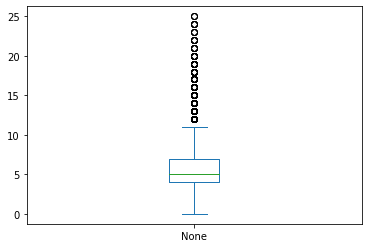

In [26]:
doc_sizes = []
for doc in trainx_seq:
    size = len(doc)
    doc_sizes.append(size)
    
pd.Series(doc_sizes).plot.box();

### From the above box plot we can consider the max document length is 11

In [27]:
max_doc_length = 11
trainx_pad = pad_sequences(trainx_seq, maxlen=max_doc_length, padding='post')
testx_pad = pad_sequences(testx_seq, maxlen=max_doc_length, padding='post')

In [28]:
trainx_pad[:5]

array([[ 326, 5422,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  31, 3530, 3531, 3532, 3533,    0,    0,    0,    0,    0,    0],
       [ 379, 5423, 2032,  595,  119, 5424,    0,    0,    0,    0,    0],
       [ 327,   16,  832,   16,    0,    0,    0,    0,    0,    0,    0],
       [  29, 1061,  246,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [29]:
trainx

861827                         choose topologies
581572         difference dank spicy fresh memes
614340    wear sash hood masters degree ceremony
269963                   poor person rich person
57790                        start preparing cat
                           ...                  
225073          prepare chocolate cakes frosting
167681                funding technology startup
425537                investors want pitch video
352757    novel original sujan stevens illinoise
261883      required start microfinance business
Name: question_text, Length: 8000, dtype: object

In [30]:
tokenizer.word_index['network']

472

### Now let's create word embedding matrix and also see the words that are not available in embeddings

In [31]:
gnews_embedding_dim = 300
# In keras tokenizer id's start from 1, there is no 0.
vocab_len = len(vocab)+1
words_not_available = []
word_embedding_matrix = np.zeros((vocab_len, gnews_embedding_dim))
for word, wid in tokenizer.word_index.items():
    if word in embeddings:
        word_embedding_matrix[wid] = embeddings[word]
    else:
        words_not_available.append(word)

In [32]:
print("Percentage of unavailable word embeddings: ",len(words_not_available)/len(vocab)*100)

Percentage of unavailable word embeddings:  15.972596412901238


## How to handle these unavailable words?
First implement other pre-trained models like fasttext or glove and check which gives you better accuracy, f1_score etc.,<br>
If there is not much improvement then below methods can be used:<br>
1. Identify synonyms of the unavailable words and check if they have word embeddings.
2. Perform lemmatization so that you get the root form of the word and check if they have word embeddings.
3. There will be some words like shouldnt, couldnt (as quotes were not considered), these we can make then as should not, could not and see if they have word embeddings.

In [33]:
from keras.models import Sequential
from keras import layers

In [34]:
model = Sequential()
model.add(layers.Embedding(vocab_len, gnews_embedding_dim,
                          weights=[word_embedding_matrix],
                          input_length=max_doc_length,
                          trainable=False))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-01-29 06:59:53.306390: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 06:59:53.424667: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 06:59:53.425512: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-29 06:59:53.426810: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 11, 300)           3897600   
_________________________________________________________________
dense (Dense)                (None, 11, 10)            3010      
_________________________________________________________________
dense_1 (Dense)              (None, 11, 1)             11        
Total params: 3,900,621
Trainable params: 3,021
Non-trainable params: 3,897,600
_________________________________________________________________


### Adding Flatten() Layer

In [36]:
model = Sequential()
model.add(layers.Embedding(vocab_len, gnews_embedding_dim,
                          weights=[word_embedding_matrix],
                          input_length=max_doc_length,
                          trainable=False))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 11, 300)           3897600   
_________________________________________________________________
flatten (Flatten)            (None, 3300)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                33010     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 3,930,621
Trainable params: 33,021
Non-trainable params: 3,897,600
_________________________________________________________________


In [38]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [39]:
model.fit(trainx_pad, trainy, epochs=10, 
          validation_data=(testx_pad, testy),
          verbose=1)

2022-01-29 06:59:56.485798: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.2512 - accuracy: 0.9325 - val_loss: 0.1958 - val_accuracy: 0.9310
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1416 - accuracy: 0.9401 - val_loss: 0.1894 - val_accuracy: 0.9310
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1169 - accuracy: 0.9402 - val_loss: 0.1839 - val_accuracy: 0.9310
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.1015 - accuracy: 0.9405 - val_loss: 0.1868 - val_accuracy: 0.9305
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0856 - accuracy: 0.9660 - val_loss: 0.1960 - val_accuracy: 0.9300
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0677 - accuracy: 0.9770 - val_loss: 0.2019 - val_accuracy: 0.9305
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0549 - accuracy: 0.9837 - val_loss: 0.2127 - val_accuracy: 0.9300
Epoch 

In [40]:
loss = model.evaluate(testx_pad, testy)
loss

63/63 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.9275


[0.2688543200492859, 0.9275000095367432]

## Model Prediction

In [41]:
test_data = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/test.csv')
test_docs = test_data['question_text'].str.lower().str.replace('[^a-z\s]','')
testx_seq = tokenizer.texts_to_sequences(test_docs)
testx_pad = pad_sequences(testx_seq, maxlen=max_doc_length, padding='post')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [42]:
test_data.shape

(375806, 2)

In [43]:
testy_pred = model.predict(testx_pad)
testy_pred

array([[9.4993716e-01],
       [3.7413832e-09],
       [3.5575037e-03],
       ...,
       [8.0259579e-06],
       [2.2282800e-06],
       [3.1870455e-01]], dtype=float32)

In [44]:
test_data.columns

Index(['qid', 'question_text'], dtype='object')

In [45]:
testy_classes = [1  if val>0.5 else 0 for val in testy_pred]

In [46]:
pred_result_df = pd.DataFrame({'qid':test_data['qid'], 'predicted_class':testy_classes})
pred_result_df

,qid,predicted_class
0,0000163e3ea7c7a74cd7,1
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


# GLOVE
* Glove doesn't use any Neural Networks.
* It calculates similarity by doing a dot product of the word embeddings.
* So Glove is a similarity that defines how often tokens cooccur together.